<a href="https://colab.research.google.com/github/UrielBaldesco/ConvolutionalNeuralNetwork-Projects/blob/main/pytorch_GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [ ]:
batch_size = 128
latent_size = 100
epochs = 50
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4542318.19it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133732.05it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:04<00:00, 401873.30it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4016556.77it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(latent_size, 128),
        nn.LeakyReLU(0.2),
        nn.Linear(128, 256),
        nn.BatchNorm1d(256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 512),
        nn.BatchNorm1d(512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 784),
        nn.Tanh()
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(784, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
d_loss_list = []
g_loss_list = []


for epoch in range(epochs):
  for i, (real_images, _) in enumerate(train_loader):
    real_images = real_images.view(-1, 784).to(device)
    batch_size = real_images.size(0)
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)


    #Train Discriminator
    optimizer_d.zero_grad()
    real_outputs = discriminator(real_images)
    real_loss = criterion(real_outputs, real_labels)


    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = generator(z)
    fake_outputs = discriminator(fake_images.detach())
    fake_loss = criterion(fake_outputs, fake_labels)


    d_loss = real_loss + fake_loss
    d_loss_list.append(d_loss.item())
    d_loss.backward()
    optimizer_d.step()


    # Train Generator

    optimizer_g.zero_grad()
    fake_outputs = discriminator(fake_images)
    g_loss = criterion(fake_outputs, real_labels)
    g_loss_list.append(g_loss.item())
    g_loss.backward()
    optimizer_g.step()


    if i % 100 == 0:
      print(f"Epoch [ {epoch}/{epochs}], Step [ {i}/{len(train_loader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

  with torch.no_grad():
    z = torch.randn(16, latent_size).to(device)
    generated_images = generator(z).view(-1, 1, 28, 28)
    save_image(generated_images, f"gan_generated_epoch_{epoch+1}.png", nrow=4, normalize=True)


Epoch [ 0/50], Step [ 0/469], D Loss: 1.4105, G Loss: 0.7354
Epoch [ 0/50], Step [ 100/469], D Loss: 1.2640, G Loss: 1.0131
Epoch [ 0/50], Step [ 200/469], D Loss: 1.2535, G Loss: 0.8591
Epoch [ 0/50], Step [ 300/469], D Loss: 1.1921, G Loss: 0.8179
Epoch [ 0/50], Step [ 400/469], D Loss: 1.2231, G Loss: 0.5876
Epoch [ 1/50], Step [ 0/469], D Loss: 1.0869, G Loss: 0.8468
Epoch [ 1/50], Step [ 100/469], D Loss: 1.0757, G Loss: 1.0043
Epoch [ 1/50], Step [ 200/469], D Loss: 1.2890, G Loss: 0.5692
Epoch [ 1/50], Step [ 300/469], D Loss: 1.0899, G Loss: 0.7692
Epoch [ 1/50], Step [ 400/469], D Loss: 1.1195, G Loss: 1.0584
Epoch [ 2/50], Step [ 0/469], D Loss: 1.0998, G Loss: 1.0174
Epoch [ 2/50], Step [ 100/469], D Loss: 1.0555, G Loss: 1.3986
Epoch [ 2/50], Step [ 200/469], D Loss: 1.0948, G Loss: 1.4440
Epoch [ 2/50], Step [ 300/469], D Loss: 1.0216, G Loss: 1.2504
Epoch [ 2/50], Step [ 400/469], D Loss: 1.6310, G Loss: 0.5845
Epoch [ 3/50], Step [ 0/469], D Loss: 0.9373, G Loss: 1.0518


In [ ]:
import glob
import cv2

In [ ]:
def fn(x):
  return(int(x.split('.')[0].split('_')[-1]))

<ipython-input-10-a3121c310794>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


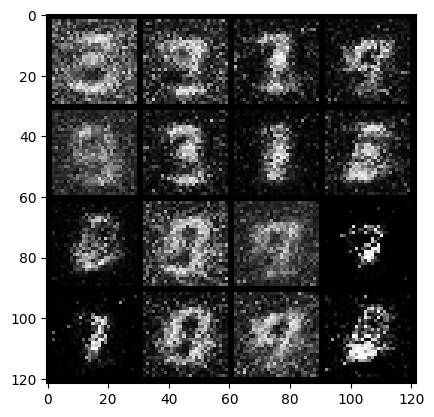

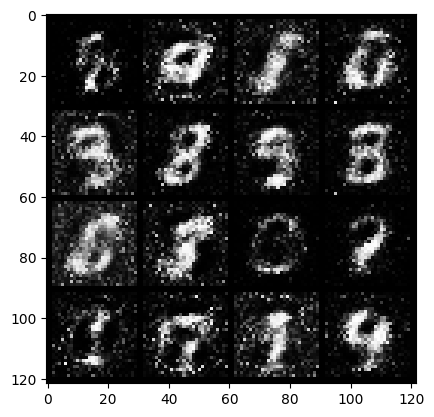

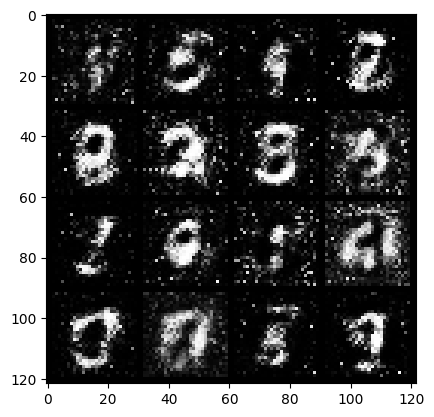

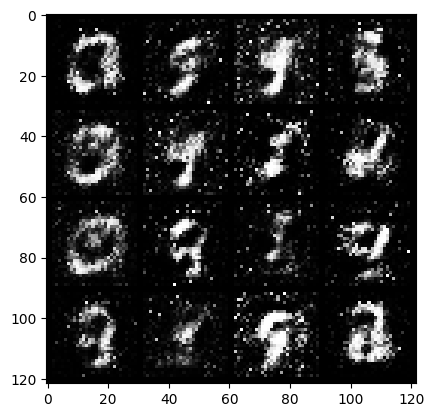

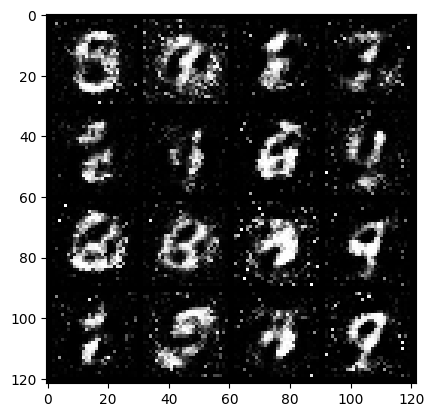

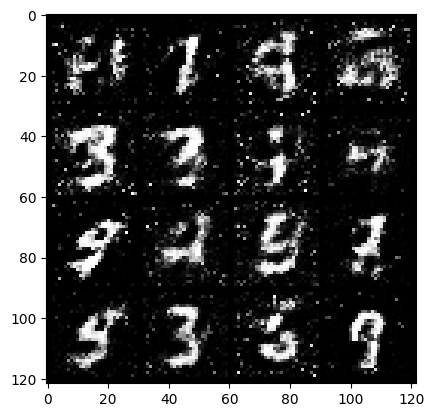

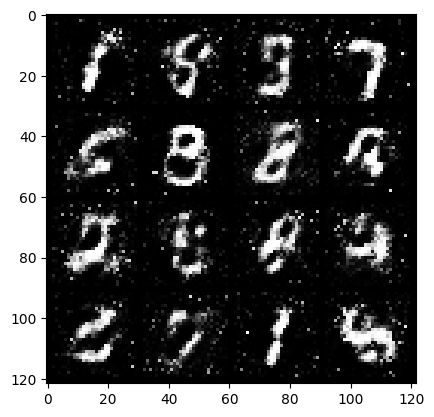

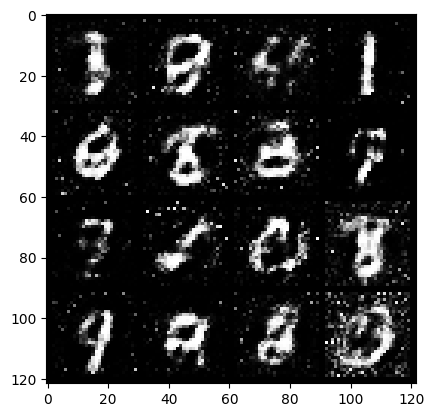

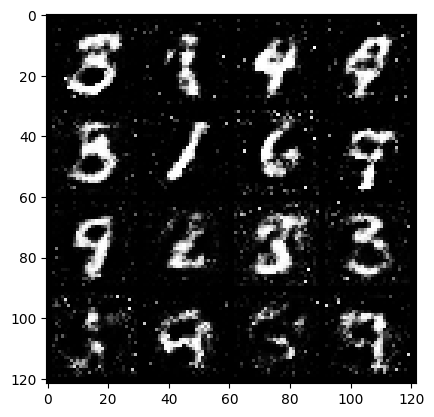

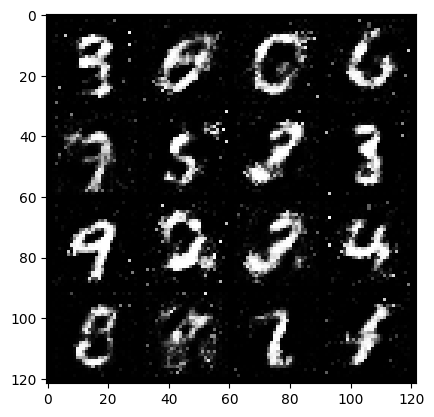

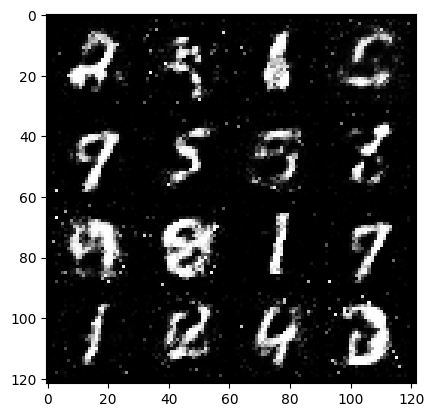

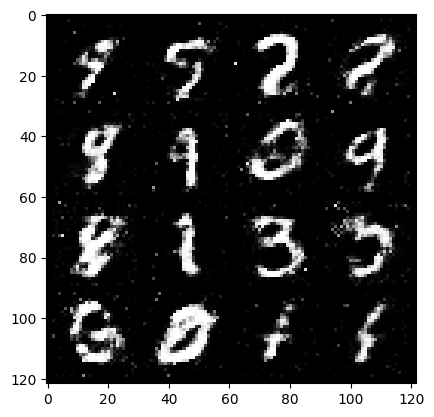

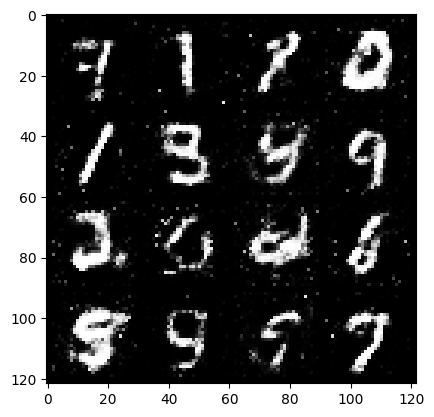

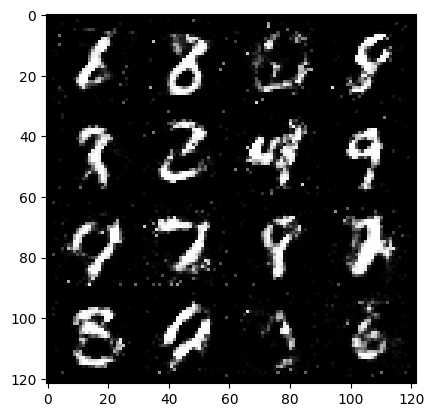

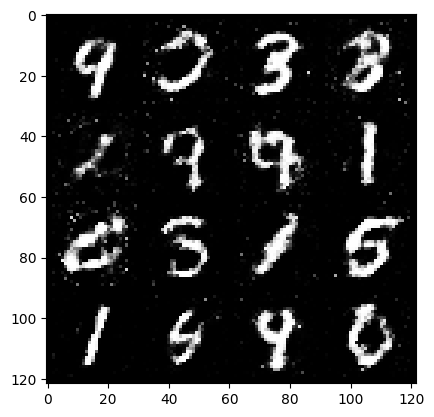

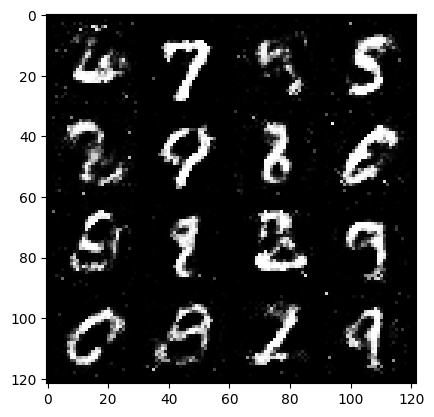

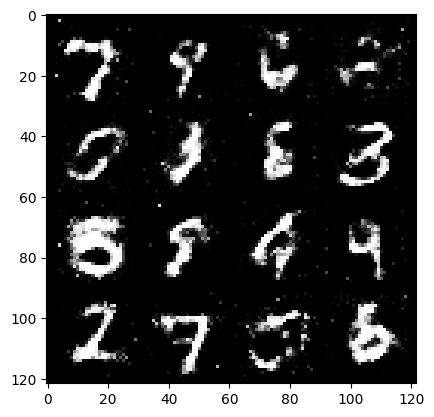

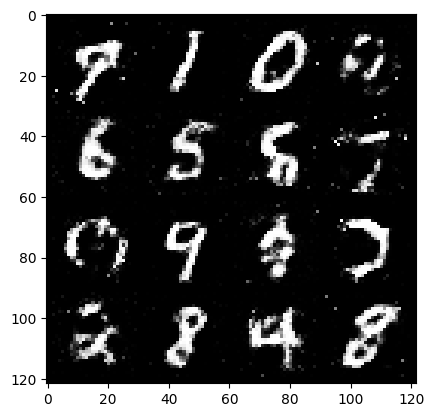

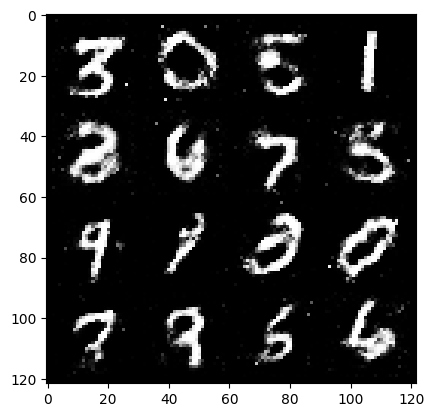

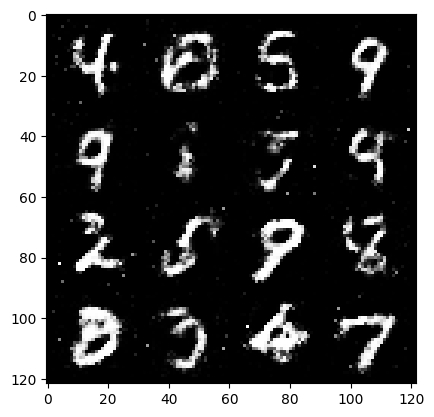

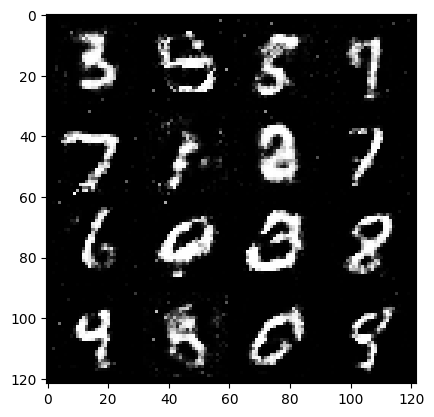

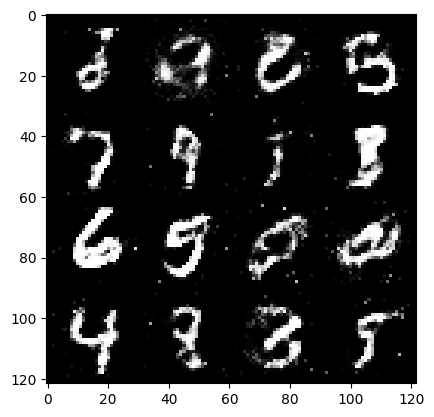

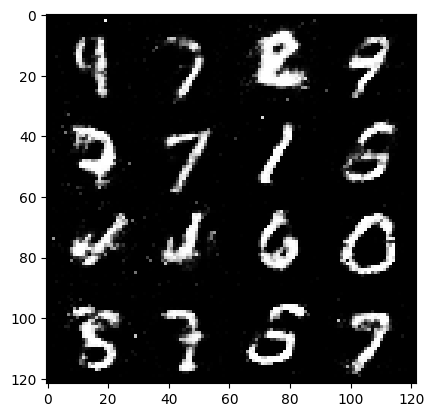

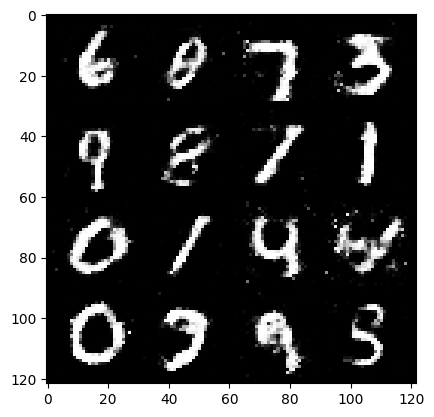

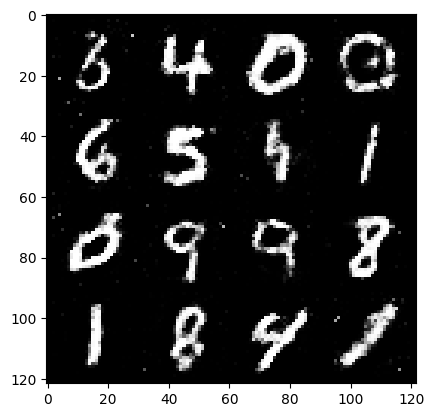

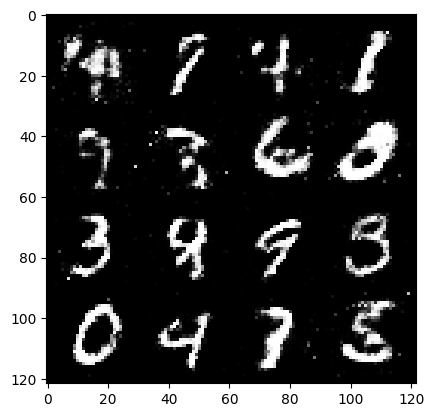

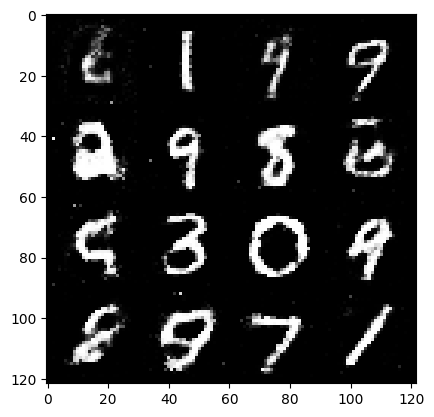

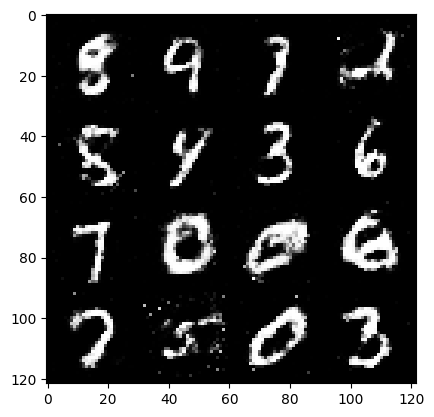

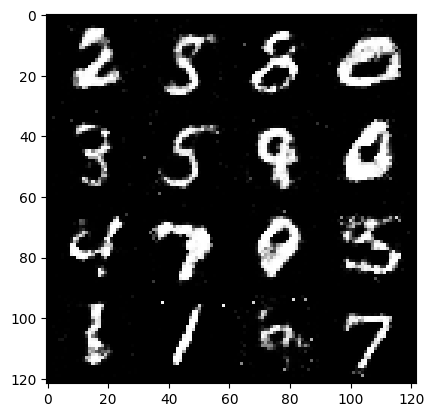

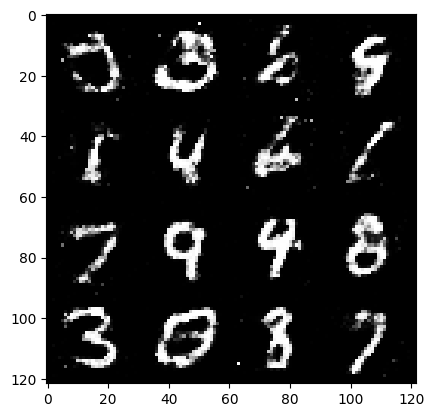

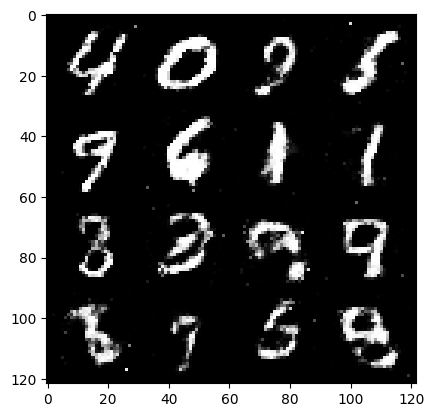

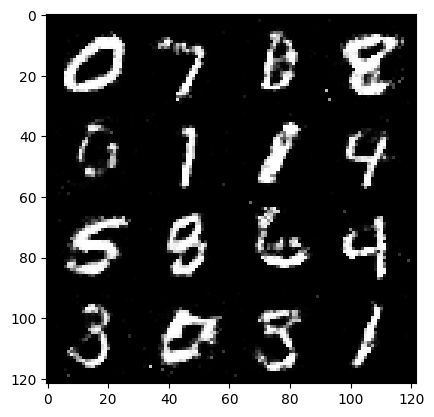

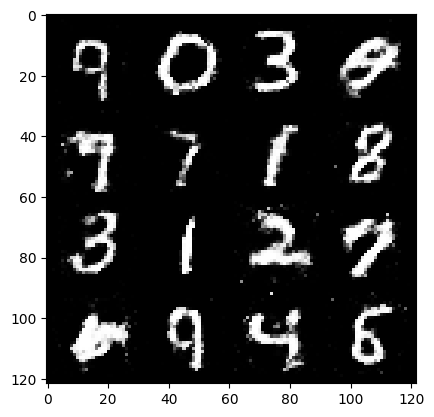

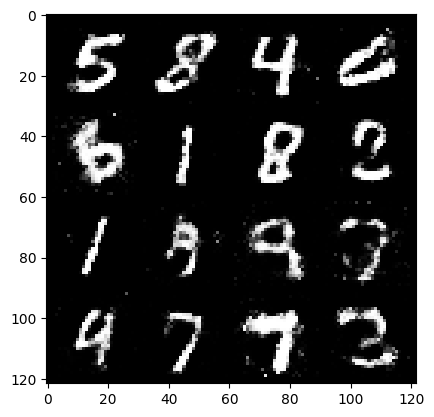

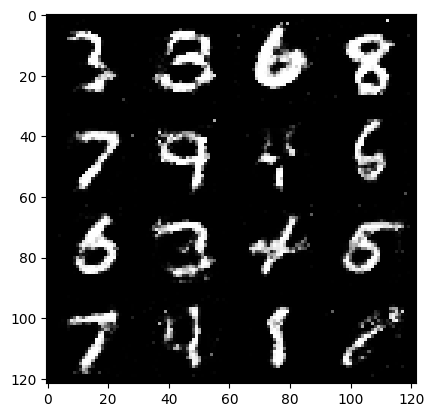

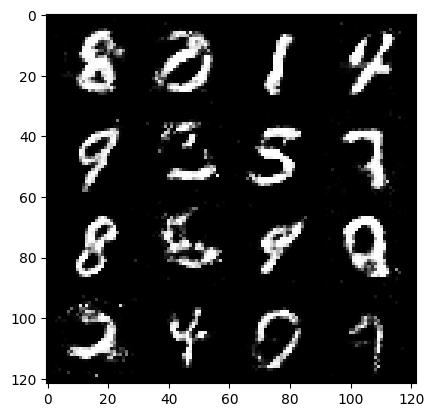

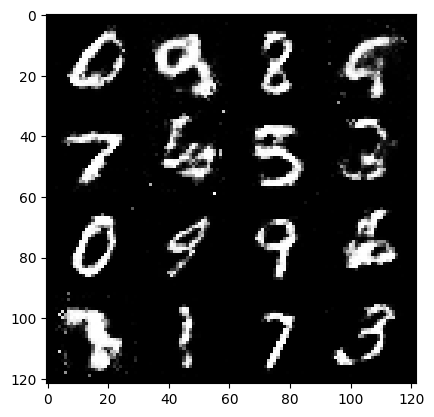

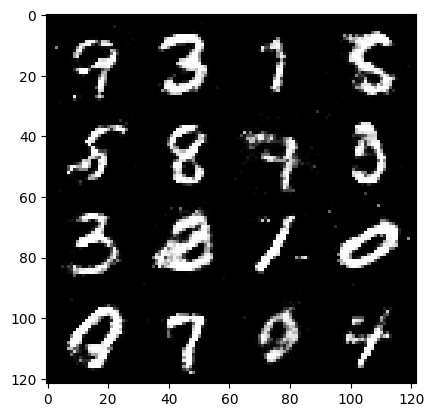

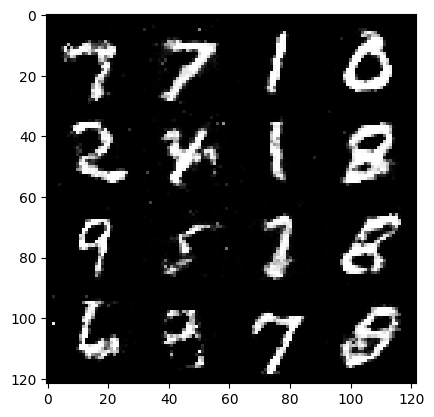

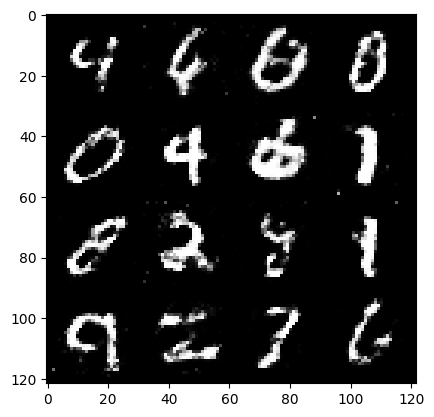

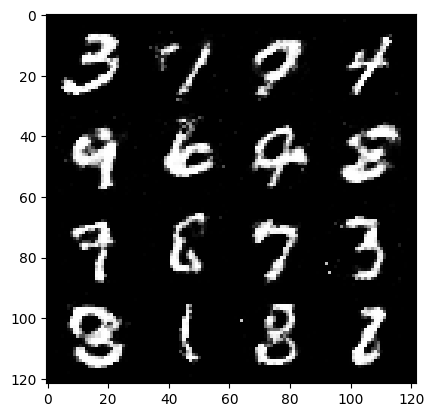

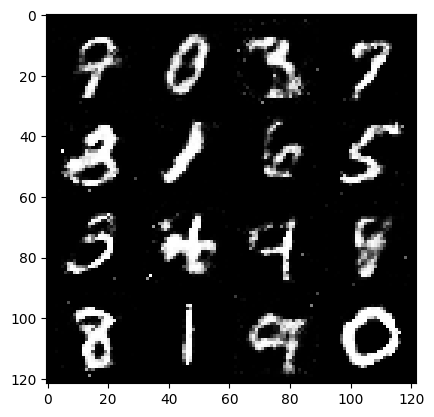

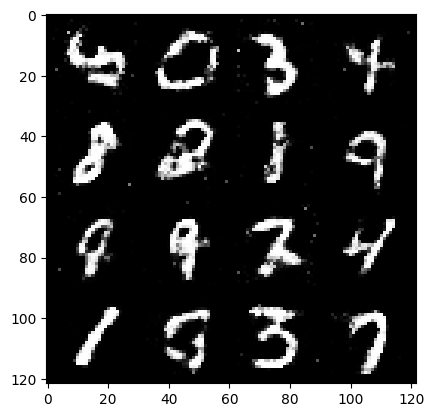

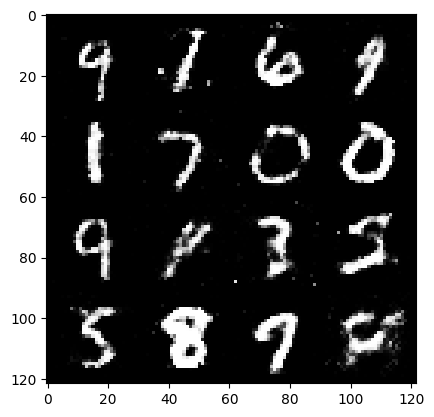

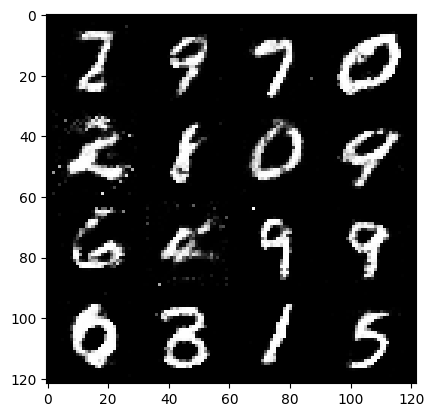

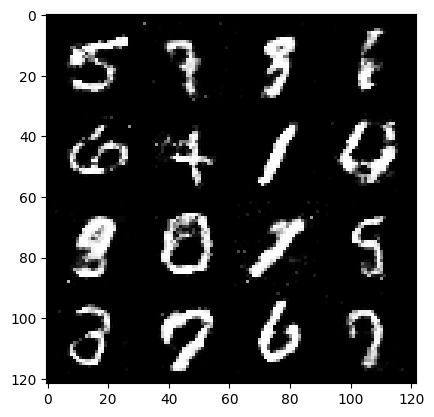

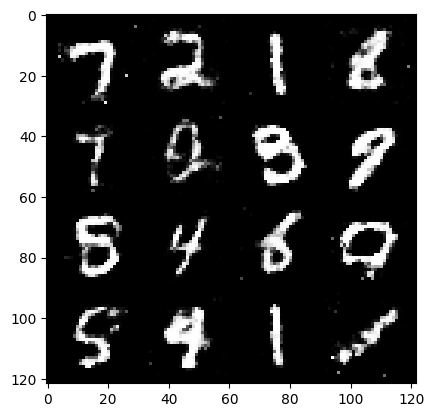

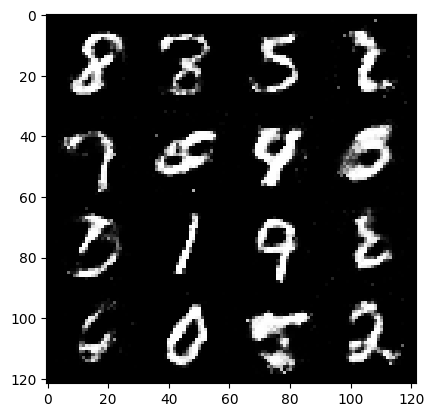

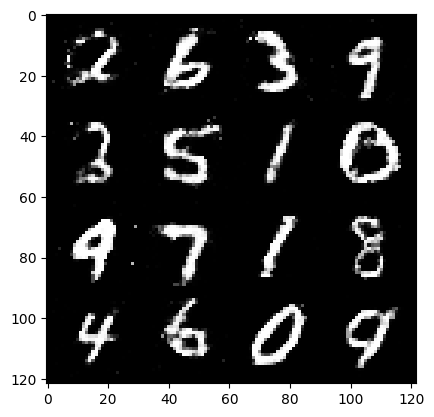

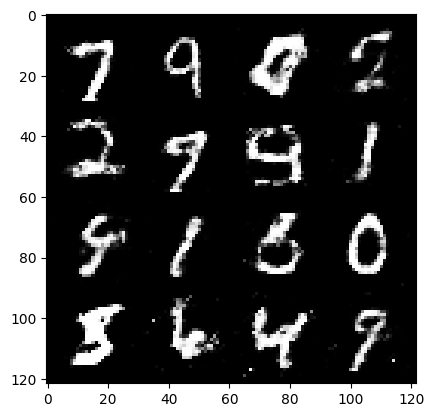

In [ ]:
for i in sorted(glob.glob('*.png'),key=fn):
  plt.figure()
  plt.imshow(cv2.imread(i), cmap="gray")

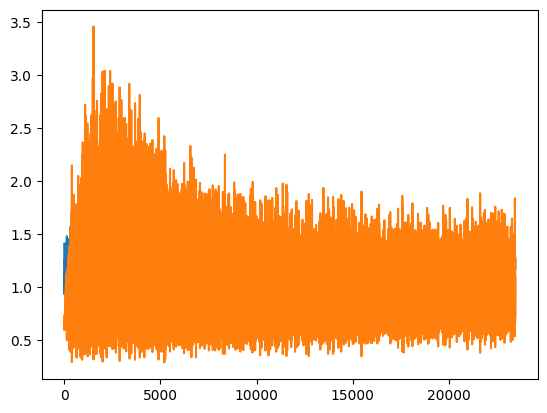

In [ ]:
plt.plot(d_loss_list)
plt.plot(g_loss_list)
plt.show()